In [56]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')
warnings.filterwarnings('ignore')

In [57]:
gia_nha = pd.read_csv("gia_nha_dat_us.csv")
df = gia_nha[['MSSubClass', 'MSZoning', 'LotArea', 'SalePrice']]
df.head()

,MSSubClass,MSZoning,LotArea,SalePrice
0,60,RL,8450,208500
1,20,RL,9600,181500
2,60,RL,11250,223500
3,70,RL,9550,140000
4,60,RL,14260,250000


In [58]:
data = df['SalePrice']
data = np.log1p(data)
data

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [59]:
# kiểm tra phân phối chuẩn

# Chuẩn hóa
def chuan_hoa(data):
    return (data -  np.mean(data))/np.std(data)

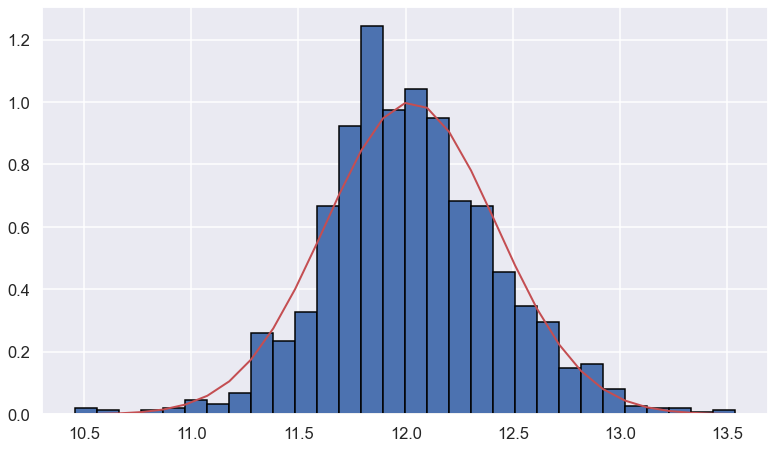

In [60]:
std = np.std(data)
count, bins, ignored = plt.hist(data, 30, edgecolor='black', density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - np.mean(data))**2 / (2 * std**2) ),linewidth=2, color='r')
plt.show()

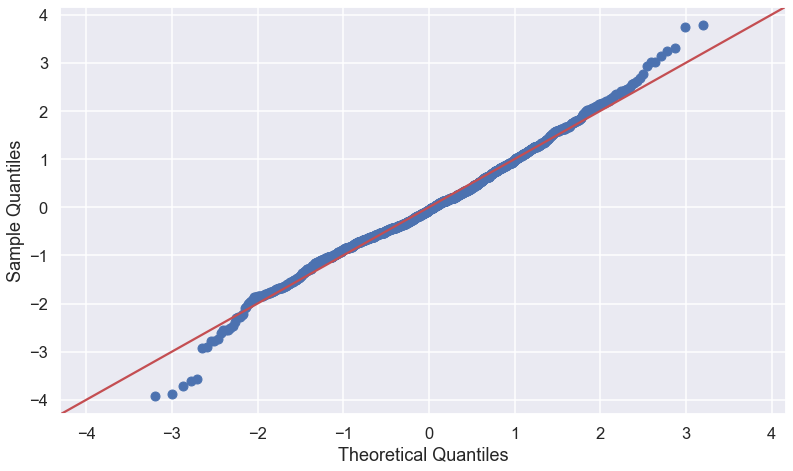

In [61]:
import statsmodels.api as sm
sm.qqplot(chuan_hoa(data), line ='45')
plt.show()

In [62]:
sample = data.sample(n=150)

In [63]:
my_mean = 180000
my_log_mean = np.log1p(my_mean)
my_log_mean

12.100717685412471

In [64]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']   
    if p['p_value'] < alpha: p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"    
    if p['p_value'] >= alpha: p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"        
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [65]:
# alternative{‘two-sided’, ‘less’, ‘greater’} : ttest version 1.6.0
# alternative{‘two-sided’, ‘smaller’, ‘larger’} : ztest

In [66]:
#Kiem dinh mean cua sample so voi ky vong mu_0= 12.100717685412471
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
from scipy.stats import ttest_1samp
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,11.992118,12.100718,-3.385571,0.000908,Chấp nhận H1 với mức ý nghĩa 0.05


In [67]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ztest(sample, value = my_log_mean,alternative='smaller')
results(p)

,mean1,mean2,score,p_value,KetLuan
,11.992118,12.100718,-3.385571,0.000355,Chấp nhận H1 với mức ý nghĩa 0.05


In [68]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ztest(sample, value = my_log_mean, alternative='larger')
results(p)

,mean1,mean2,score,p_value,KetLuan
,11.992118,12.100718,-3.385571,0.999645,Chấp nhận H0 với mức ý nghĩa 0.05
